In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
pd.set_option('display.max_columns', 1500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
def print_results(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred, average='macro'))
    print('cohen_kappa_score:', cohen_kappa_score(y_true, y_pred))
    # print('roc_auc-score:', roc_auc_score(y_true, y_pred, average="weighted", multi_class="ovo"))
def plot_validation_curve(model_grid, param_name, params=None):
    results_df = pd.DataFrame(model_grid.cv_results_)
    
    if params == None:
        plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
    else:
        plt.plot(params, results_df['mean_test_score'])

    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

In [3]:
df = pd.read_csv('age_final_numeric_corr_2.csv')
labels = df['target']
df_mod = df.drop('target', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(df_mod)
X_train, X_valid, y_train, y_valid = train_test_split(X, labels, test_size=0.15, random_state=42, stratify = labels)

BAGGING CLASSIFIER

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=1.0, n_estimators=10)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5)

In [5]:
y_pred = bagging.predict(X_valid)
print_results(y_valid, y_pred)

[[315 163  60  31  30  41]
 [185 261 106  40  28  25]
 [119 117 142 136 103  68]
 [ 68  45 135 191 179 135]
 [ 45  32  76 154 238 226]
 [ 30   9  33  78 179 442]]
              precision    recall  f1-score   support

           1       0.41      0.49      0.45       640
           2       0.42      0.40      0.41       645
           3       0.26      0.21      0.23       685
           4       0.30      0.25      0.28       753
           5       0.31      0.31      0.31       771
           6       0.47      0.57      0.52       771

    accuracy                           0.37      4265
   macro avg       0.36      0.37      0.37      4265
weighted avg       0.36      0.37      0.37      4265

F1-score: 0.36576949887381077
cohen_kappa_score: 0.2461372355551481


In [6]:
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=1.0, n_estimators=20)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  n_estimators=20)

In [7]:
y_pred = bagging.predict(X_valid)
print_results(y_valid, y_pred)

[[319 171  49  37  26  38]
 [186 266  97  39  29  28]
 [121 105 147 143  98  71]
 [ 66  42 145 196 173 131]
 [ 40  29  81 153 228 240]
 [ 33  11  24  73 186 444]]
              precision    recall  f1-score   support

           1       0.42      0.50      0.45       640
           2       0.43      0.41      0.42       645
           3       0.27      0.21      0.24       685
           4       0.31      0.26      0.28       753
           5       0.31      0.30      0.30       771
           6       0.47      0.58      0.52       771

    accuracy                           0.38      4265
   macro avg       0.37      0.38      0.37      4265
weighted avg       0.36      0.38      0.37      4265

F1-score: 0.36851769297275777
cohen_kappa_score: 0.24920825273292757


RANDOM FOREST | EXTRA TREES

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print_results(y_valid, y_pred)

[[344 171  43  39  20  23]
 [208 307  83  23  11  13]
 [109 120 215 127  75  39]
 [ 49  52 157 236 163  96]
 [ 47  36  86 194 223 185]
 [ 27  14  50  86 223 371]]
              precision    recall  f1-score   support

           1       0.44      0.54      0.48       640
           2       0.44      0.48      0.46       645
           3       0.34      0.31      0.33       685
           4       0.33      0.31      0.32       753
           5       0.31      0.29      0.30       771
           6       0.51      0.48      0.50       771

    accuracy                           0.40      4265
   macro avg       0.40      0.40      0.40      4265
weighted avg       0.39      0.40      0.39      4265

F1-score: 0.39747483722938365
cohen_kappa_score: 0.2772582610005734


Best estimator by estimators number: RandomForestClassifier(n_estimators=160, random_state=0)
Best score by estimators number: 0.42925013623284014


Text(0, 0.5, 'Mean accuracy on test set')

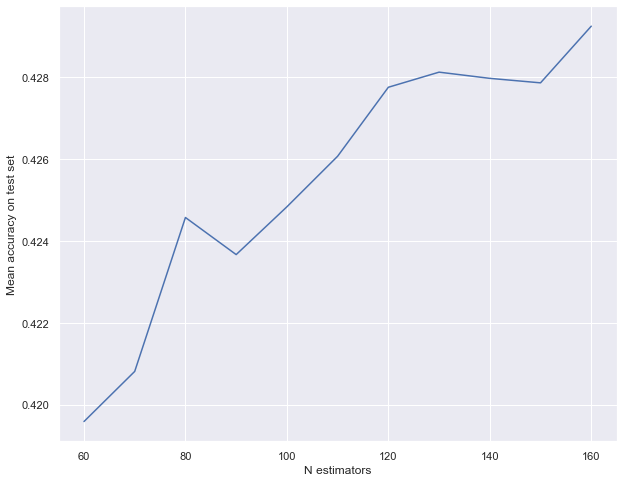

In [9]:
forest_params = {'n_estimators': np.arange(60, 170, 10)}

forest_grid = GridSearchCV(rf, forest_params, cv=5, scoring='f1_macro')
forest_grid.fit(X_train, y_train)
print('Best estimator by estimators number:', forest_grid.best_estimator_)
print('Best score by estimators number:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_n_estimators'], results_df['mean_test_score'])
plt.xlabel('N estimators')
plt.ylabel('Mean accuracy on test set')

In [10]:
et = ExtraTreesClassifier(n_estimators=10, random_state=3, n_jobs=-1)
et.fit(X_train, y_train)
y_pred = et.predict(X_valid)
print_results(y_valid, y_pred)

[[332 173  47  40  24  24]
 [207 275  97  38  14  14]
 [109 132 193 133  69  49]
 [ 61  57 165 222 165  83]
 [ 52  37  83 202 219 178]
 [ 38  15  59 107 210 342]]
              precision    recall  f1-score   support

           1       0.42      0.52      0.46       640
           2       0.40      0.43      0.41       645
           3       0.30      0.28      0.29       685
           4       0.30      0.29      0.30       753
           5       0.31      0.28      0.30       771
           6       0.50      0.44      0.47       771

    accuracy                           0.37      4265
   macro avg       0.37      0.37      0.37      4265
weighted avg       0.37      0.37      0.37      4265

F1-score: 0.37114769075929205
cohen_kappa_score: 0.24557250619025706


In [11]:
et_params={'n_estimators': np.arange(10, 121, 10)}

et_grid = GridSearchCV(et, et_params, cv=5, scoring='f1_macro', n_jobs=-1)
et_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(n_estimators=10, n_jobs=-1,
                                            random_state=3),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120])},
             scoring='f1_macro')

0.41357009386393206


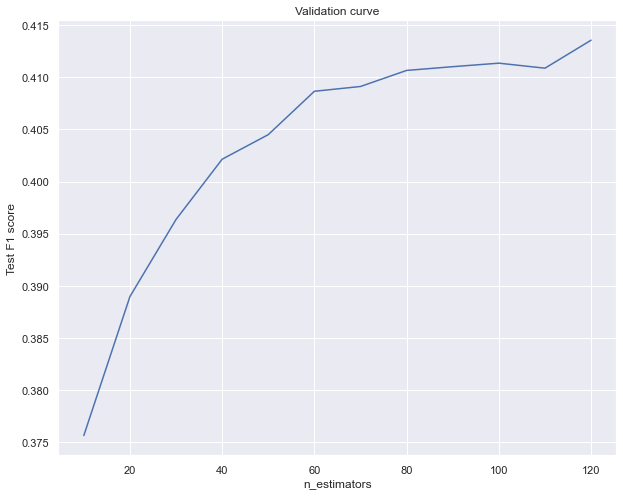

In [12]:
print(et_grid.best_score_)
plot_validation_curve(et_grid, 'n_estimators')

ADABOOST

In [13]:
ab = AdaBoostClassifier(random_state=17)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_valid)
print_results(y_valid, y_pred)

[[218 287  64  23  18  30]
 [147 354 110   8   7  19]
 [ 90 104 224 121  73  73]
 [ 52  31 138 232 177 123]
 [ 32  17  72 152 255 243]
 [ 24   6  35  43 195 468]]
              precision    recall  f1-score   support

           1       0.39      0.34      0.36       640
           2       0.44      0.55      0.49       645
           3       0.35      0.33      0.34       685
           4       0.40      0.31      0.35       753
           5       0.35      0.33      0.34       771
           6       0.49      0.61      0.54       771

    accuracy                           0.41      4265
   macro avg       0.40      0.41      0.40      4265
weighted avg       0.40      0.41      0.40      4265

F1-score: 0.4035531873067386
cohen_kappa_score: 0.29189211214830324


In [14]:
ab_n_estimators = {'n_estimators': np.arange(50, 150, 10)}
ab_grid = GridSearchCV(ab, ab_n_estimators, cv=5, scoring='f1_macro', n_jobs=-1)
ab_grid.fit(X_train, y_train)

print(ab_grid.best_score_)
print(ab_grid.best_params_)

0.4078019774283385
{'n_estimators': 70}


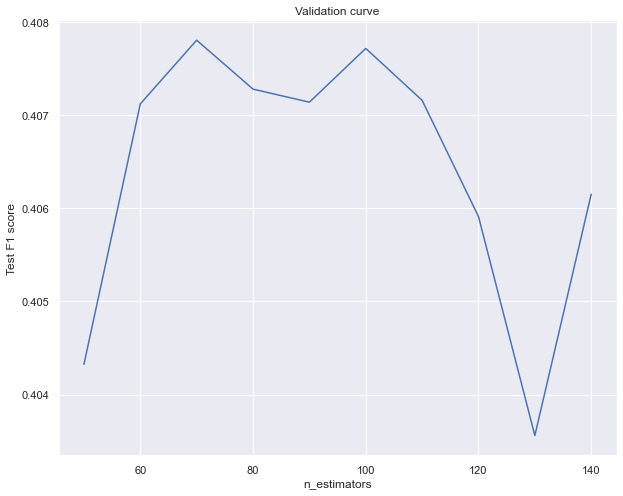

In [15]:
plot_validation_curve(ab_grid, 'n_estimators')

In [16]:
ab_l_rate = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 10]}
ab_grid = GridSearchCV(ab, ab_l_rate, cv=5, scoring='f1_macro', n_jobs=-1)
ab_grid.fit(X_train, y_train)

print(ab_grid.best_score_)
print(ab_grid.best_params_)

0.41564248844626395
{'learning_rate': 0.5}


In [17]:
ab_params = {'n_estimators': np.arange(20, 201, 20), 
             'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 5, 10]}
ab_grid = GridSearchCV(ab, ab_params, cv=5, scoring='f1_macro', n_jobs=-1)
ab_grid.fit(X_train, y_train)

print(ab_grid.best_score_)
print(ab_grid.best_params_)

0.42198342374231307
{'learning_rate': 0.5, 'n_estimators': 80}


In [18]:
ab_best = ab_grid.best_estimator_
y_pred = ab_best.predict(X_valid)
print_results(y_valid, y_pred)

[[240 259  67  25  12  37]
 [150 337 116  15   2  25]
 [ 98  82 219 142  69  75]
 [ 53  17 133 260 155 135]
 [ 33  13  65 170 222 268]
 [ 25   2  26  50 160 508]]
              precision    recall  f1-score   support

           1       0.40      0.38      0.39       640
           2       0.47      0.52      0.50       645
           3       0.35      0.32      0.33       685
           4       0.39      0.35      0.37       753
           5       0.36      0.29      0.32       771
           6       0.48      0.66      0.56       771

    accuracy                           0.42      4265
   macro avg       0.41      0.42      0.41      4265
weighted avg       0.41      0.42      0.41      4265

F1-score: 0.4106928213382739
cohen_kappa_score: 0.30145212036979585


GRADIENT BOOSTING

In [4]:
gb = GradientBoostingClassifier(random_state=17)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
print_results(y_valid, y_pred)

[[368 154  49  20  19  30]
 [187 337  81  15   9  16]
 [ 97 105 198 147  78  60]
 [ 62  16 125 252 180 118]
 [ 42  21  53 155 244 256]
 [ 28   4  20  37 175 507]]
              precision    recall  f1-score   support

           1       0.47      0.57      0.52       640
           2       0.53      0.52      0.53       645
           3       0.38      0.29      0.33       685
           4       0.40      0.33      0.37       753
           5       0.35      0.32      0.33       771
           6       0.51      0.66      0.58       771

    accuracy                           0.45      4265
   macro avg       0.44      0.45      0.44      4265
weighted avg       0.44      0.45      0.44      4265

F1-score: 0.440415798021045
cohen_kappa_score: 0.33552060644406256


In [15]:
gb_n_estimators = {'n_estimators': np.arange(20, 201, 20)}
gb_grid = GridSearchCV(gb, gb_n_estimators, cv=5, scoring='f1_macro', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(gb_grid.best_score_)
print(gb_grid.best_params_)

gb_best = gb_grid.best_estimator_
y_pred = gb_best.predict(X_valid)
print_results(y_valid, y_pred)

In [7]:
gb_max_depth = {'max_depth': np.arange(3, 6)}
gb_grid = GridSearchCV(gb, gb_max_depth, cv=3, scoring='f1_macro', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(gb_grid.best_score_)
print(gb_grid.best_params_)
# before range(1, 5): 4 - best

0.4473416458399965
{'max_depth': 4}


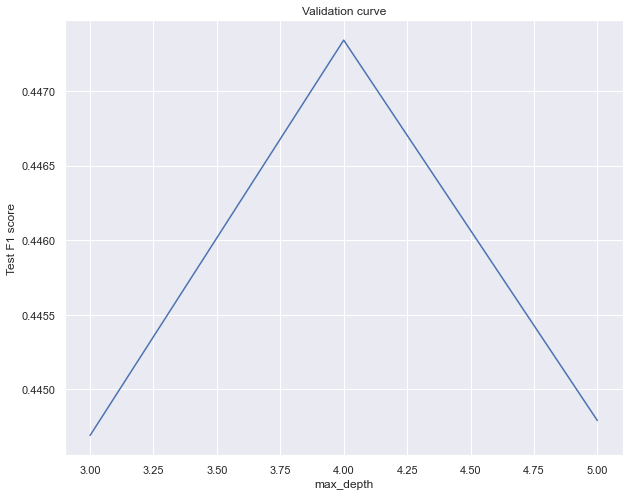

In [8]:
plot_validation_curve(gb_grid, 'max_depth')

In [8]:
gb_best = gb_grid.best_estimator_
y_pred = gb_best.predict(X_valid)
print_results(y_valid, y_pred)

[[371 158  48  23  17  23]
 [185 344  73  21   8  14]
 [ 90 104 217 143  77  54]
 [ 57  17 135 258 173 113]
 [ 40  24  56 155 247 249]
 [ 28   4  19  45 161 514]]
              precision    recall  f1-score   support

           1       0.48      0.58      0.53       640
           2       0.53      0.53      0.53       645
           3       0.40      0.32      0.35       685
           4       0.40      0.34      0.37       753
           5       0.36      0.32      0.34       771
           6       0.53      0.67      0.59       771

    accuracy                           0.46      4265
   macro avg       0.45      0.46      0.45      4265
weighted avg       0.45      0.46      0.45      4265

F1-score: 0.4515091640247824
cohen_kappa_score: 0.3482949152038721


XGBOOST

In [9]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()
# parallel tree boosting
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_valid)
print_results(y_valid, y_pred)

[20:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[366 164  46  20  19  25]
 [178 352  74  15   9  17]
 [ 89 109 221 139  74  53]
 [ 47  33 135 236 188 114]
 [ 45  25  68 167 210 256]
 [ 21  10  19  53 147 521]]
              precision    recall  f1-score   support

           1       0.49      0.57      0.53       640
           2       0.51      0.55      0.53       645
           3       0.39      0.32      0.35       685
           4       0.37      0.31      0.34       753
           5       0.32      0.27      0.30       771
           6       0.53      0.68      0.59       771

    accuracy                           0.45      4265
   macro avg       0.44      0.45      0.44      4265
weighted avg       0.43      0.45     

In [10]:
xgb_params = {'n_estimators': [20, 50, 100, 200],
             'max_depth': [2, 4, 6]}
xgb_grid = GridSearchCV(xgbc, xgb_params, cv=5, scoring='f1_macro', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

[20:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4466711704085139
{'max_depth': 4, 'n_estimators': 100}


In [11]:
xgb_best = xgb_grid.best_estimator_
y_pred = xgb_best.predict(X_valid)
print_results(y_valid, y_pred)

[[381 155  35  23  17  29]
 [186 357  58  18  11  15]
 [ 96 106 207 143  72  61]
 [ 55  30 132 248 170 118]
 [ 42  24  61 148 242 254]
 [ 28   5  15  49 155 519]]
              precision    recall  f1-score   support

           1       0.48      0.60      0.53       640
           2       0.53      0.55      0.54       645
           3       0.41      0.30      0.35       685
           4       0.39      0.33      0.36       753
           5       0.36      0.31      0.34       771
           6       0.52      0.67      0.59       771

    accuracy                           0.46      4265
   macro avg       0.45      0.46      0.45      4265
weighted avg       0.45      0.46      0.45      4265

F1-score: 0.4506072640417759
cohen_kappa_score: 0.34921610120531255


STACKING

In [5]:
from sklearn.ensemble import StackingClassifier
estimators = [('knn', KNeighborsClassifier()), 
              ('tree', DecisionTreeClassifier(max_depth=7, random_state=42)),
              ('log_reg', LogisticRegression())]
stack = StackingClassifier(estimators=estimators,
                           final_estimator=RandomForestClassifier(n_estimators=10))
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('tree',
                                DecisionTreeClassifier(max_depth=7,
                                                       random_state=42)),
                               ('log_reg', LogisticRegression())],
                   final_estimator=RandomForestClassifier(n_estimators=10))

In [6]:
y_pred = stack.predict(X_valid)
print_results(y_valid, y_pred)

[[348 170  47  36  20  19]
 [209 306  84  17  17  12]
 [ 98 135 187 145  68  52]
 [ 54  53 167 225 158  96]
 [ 38  33 102 171 214 213]
 [ 27  14  54 104 199 373]]
              precision    recall  f1-score   support

           1       0.45      0.54      0.49       640
           2       0.43      0.47      0.45       645
           3       0.29      0.27      0.28       685
           4       0.32      0.30      0.31       753
           5       0.32      0.28      0.30       771
           6       0.49      0.48      0.49       771

    accuracy                           0.39      4265
   macro avg       0.38      0.39      0.39      4265
weighted avg       0.38      0.39      0.38      4265

F1-score: 0.386198629217463
cohen_kappa_score: 0.2651877434768328
